
# Project: Investigate a TMDb movie Database¶

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I am using TMDb movies dataset which contains 10k+ movies details including budgets, runtime, revenues, etc.

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pprint


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [61]:
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

**Assumptions:**
* The dataset doesn't contain any currency details. So, I will be assuming budget, revenue related column will be represented in USD.

On further analysing the dataset, following cleaning process will be performed,
1. Remove any duplicate records.
2. Discarding movies have 0 budget or 0 revenue as it won't contribute any details for our analysis.
3. Change date, budget and revenue columns to reflect the extact datatypes.
4. Remove unused columns from the dataset like (id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average)
5. Convert to 0 to NAN in runtime column as no movies will have runtime to zero.
### Data Cleaning

**Removing unwanted columns from the dataset**

In [62]:
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 
           'production_companies', 'vote_count', 'vote_average']

movies_data = movies_data.drop(del_col, 1)
movies_data.head(5)

budget     revenue                original_title  \
0  150000000  1513528810                Jurassic World   
1  150000000   378436354            Mad Max: Fury Road   
2  110000000   295238201                     Insurgent   
3  200000000  2068178225  Star Wars: The Force Awakens   
4  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   
4            Vengeance Hits Home      137   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller       6/9/15          2015  
1  Action|Adventure|Science Fiction|Thriller      5/13/15          2015  
2         Adventure|Science Fiction|Thriller      3/18/15          2015  
3   Action|Adventure|Science Fiction|Fantasy     12/15/15          2015  
4                      Action|Crime|Thriller       4/1/15          2015

**Remove duplicate records from the dataset**

In [63]:
rows, cols = movies_data.shape
print('Dataset contains {} entries before removing duplicates'.format(rows-1))

movies_data.drop_duplicates(keep='first', inplace=True)
rows, cols = movies_data.shape
print('Dataset contains {} entries after removing duplicates'.format(rows-1))

Dataset contains 10865 entries before removing duplicates
Dataset contains 10864 entries after removing duplicates


**Remove movies which has 0 budget or 0 revenue.**

In [64]:
zero_cols = ['budget', 'revenue']

movies_data[zero_cols] = movies_data[zero_cols].replace(0, np.NAN)

movies_data.dropna(subset = zero_cols, inplace = True)

rows, col = movies_data.shape
print('After cleaning, we now have only {} movies in the database'.format(rows-1))

After cleaning, we now have only 3853 movies in the database


**Change release_Date column to standard datetime format**

In [65]:
movies_data["release_date"] = pd.to_datetime(movies_data['release_date'])
movies_data.head(3)

budget       revenue      original_title  \
0  150000000.0  1.513529e+09      Jurassic World   
1  150000000.0  3.784364e+08  Mad Max: Fury Road   
2  110000000.0  2.952382e+08           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

                      tagline  runtime  \
0           The park is open.      124   
1          What a Lovely Day.      120   
2  One Choice Can Destroy You      119   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller   2015-06-09          2015  
1  Action|Adventure|Science Fiction|Thriller   2015-05-13          2015  
2         Adventure|Science Fiction|Thriller   2015-03-18          2015

**Analyze the data types of all the column and change type of any column if required**

In [66]:
movies_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

budget and revenue are in float type. But need it in INT type, so converting those column to INT type.

In [67]:
convert_cols = ['budget', 'revenue']

movies_data[convert_cols] = movies_data[convert_cols].applymap(np.int64)

movies_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

Questions that can be brainstormed on this dataset are,
1. Movies that has most and least profits
2. Movies with largest and smallest budgets
3. Movies with more and less revenue earned
4. Movies with largest and shortest runtime
5. Plot between Year of release vs profitability
6. Who casts more movies?
7. Which director directs more movies?
8. Which genres were more successful?
. 
### Calculating profit of every movie

In [68]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
movies_data.insert(2, "profit_earned", movies_data['revenue']-movies_data['budget'])
movies_data.head(2)

budget     revenue  profit_earned      original_title  \
0  150000000  1513528810     1363528810      Jurassic World   
1  150000000   378436354      228436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

              tagline  runtime                                     genres  \
0   The park is open.      124  Action|Adventure|Science Fiction|Thriller   
1  What a Lovely Day.      120  Action|Adventure|Science Fiction|Thriller   

  release_date  release_year  
0   2015-06-09          2015  
1   2015-05-13          2015

### Movies that has most and least profits

In [69]:
def calculate(column_name):
    index_max_profit = movies_data[column_name].idxmax()
    index_min_profit = movies_data[column_name].idxmin()

    max_details = pd.DataFrame(movies_data.loc[index_max_profit])
    min_details = pd.DataFrame(movies_data.loc[index_min_profit])

    info = pd.concat([max_details, min_details], axis=1)

    return info

calculate('profit_earned')

1386  \
budget                                                  237000000   
revenue                                                2781505847   
profit_earned                                          2544505847   
original_title                                             Avatar   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                            James Cameron   
tagline                               Enter the World of Pandora.   
runtime                                                       162   
genres                   Action|Adventure|Fantasy|Science Fiction   
release_date                                  2009-12-10 00:00:00   
release_year                                                 2009   

                                                             2244  
budget                                                  425000000  
revenue                                                  11087569  
profit_earned                                          -413912431  
original_title                                  The Warrior's Way  
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
director                                               Sngmoo Lee  
tagline                                   Assassin. Hero. Legend.  
runtime                                                       100  
genres                  Adventure|Fantasy|Action|Western|Thriller  
release_date                                  2010-12-02 00:00:00  
release_year                                                 2010

1. Header 1386 and 2244 denotes the index of the record in dataframe
2. Data at 1386 has maximum profit of 2544505847
3. Data at 2244 has minimum profit of -413912431

### Movies with largest and smallest budgets

In [70]:
calculate('budget')

2244  \
budget                                                  425000000   
revenue                                                  11087569   
profit_earned                                          -413912431   
original_title                                  The Warrior's Way   
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                               Sngmoo Lee   
tagline                                   Assassin. Hero. Legend.   
runtime                                                       100   
genres                  Adventure|Fantasy|Action|Western|Thriller   
release_date                                  2010-12-02 00:00:00   
release_year                                                 2010   

                                                             2618  
budget                                                          1  
revenue                                                       100  
profit_earned                                                  99  
original_title                                       Lost & Found  
cast            David Spade|Sophie Marceau|Ever Carradine|Step...  
director                                             Jeff Pollack  
tagline         A comedy about a guy who would do anything to ...  
runtime                                                        95  
genres                                             Comedy|Romance  
release_date                                  1999-04-23 00:00:00  
release_year                                                 1999

1. Movie at 2244 has highest budget 425000000 dollars
2. Movie at 2618 has smallest budget $1

### Movies with more and less revenue earned

In [71]:
calculate('revenue')

1386  \
budget                                                  237000000   
revenue                                                2781505847   
profit_earned                                          2544505847   
original_title                                             Avatar   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                            James Cameron   
tagline                               Enter the World of Pandora.   
runtime                                                       162   
genres                   Action|Adventure|Fantasy|Science Fiction   
release_date                                  2009-12-10 00:00:00   
release_year                                                 2009   

                                                             5067  
budget                                                    6000000  
revenue                                                         2  
profit_earned                                            -5999998  
original_title                                    Shattered Glass  
cast            Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...  
director                                                Billy Ray  
tagline                                                       NaN  
runtime                                                        94  
genres                                              Drama|History  
release_date                                  2003-11-14 00:00:00  
release_year                                                 2003

1. Movie at 1386 has highest revenue of 2781505847 dollars
2. Movie at 2618 has smallest revenue of 2 dollars

### Movies with largest and shortest runtime

In [72]:
calculate('runtime')

2107  \
budget                                                   18000000   
revenue                                                    871279   
profit_earned                                           -17128721   
original_title                                             Carlos   
cast            Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...   
director                                          Olivier Assayas   
tagline                            The man who hijacked the world   
runtime                                                       338   
genres                               Crime|Drama|Thriller|History   
release_date                                  2010-05-19 00:00:00   
release_year                                                 2010   

                                                             5162  
budget                                                         10  
revenue                                                         5  
profit_earned                                                  -5  
original_title                                        Kid's Story  
cast            Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...  
director                                      Shinichiro Watanabe  
tagline                                                       NaN  
runtime                                                        15  
genres                                  Science Fiction|Animation  
release_date                                  2003-06-02 00:00:00  
release_year                                                 2003

Movie **Carlos** has largest runtime of 338 minutes whereas **Kid's Story** has less runtime of 15 minutes

### Plot between Year of release vs profitability

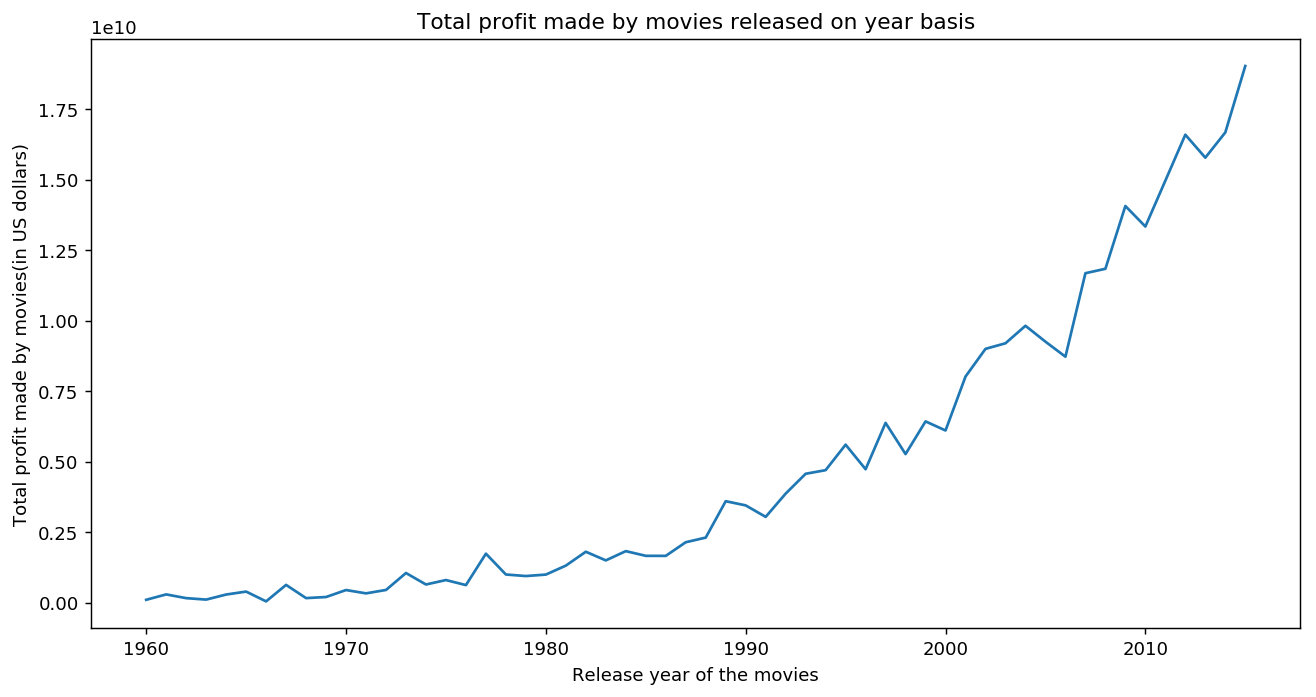

In [73]:
profits_each_year = movies_data.groupby('release_year')['profit_earned'].sum()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release year of the movies')
plt.ylabel('Total profit made by movies(in US dollars)')
plt.title('Total profit made by movies released on year basis')
plt.plot(profits_each_year)
plt.show()

**For the upcoming analysis, we will be considering only movies having profit > 50 millions in dollar**

In [74]:
profit_movies_data = movies_data[movies_data['profit_earned'] > 50000000]
profit_movies_data.head(5)

budget     revenue  profit_earned                original_title  \
0  150000000  1513528810     1363528810                Jurassic World   
1  150000000   378436354      228436354            Mad Max: Fury Road   
2  110000000   295238201      185238201                     Insurgent   
3  200000000  2068178225     1868178225  Star Wars: The Force Awakens   
4  190000000  1506249360     1316249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   
4            Vengeance Hits Home      137   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller   2015-06-09          2015  
1  Action|Adventure|Science Fiction|Thriller   2015-05-13          2015  
2         Adventure|Science Fiction|Thriller   2015-03-18          2015  
3   Action|Adventure|Science Fiction|Fantasy   2015-12-15          2015  
4                      Action|Crime|Thriller   2015-04-01          2015

In [75]:
def extract_data(column_name):
    data = profit_movies_data[column_name].str.cat(sep = '|')
    data =pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

### Who casts more movies?

In [76]:
output = extract_data('cast')
output.head(5)

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

**Tom Cruise** appears in more movies than anyother actors.

### Which director directs more movies?

In [77]:
output = extract_data('director')
output.head(5)

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

The above result clearly shows **Steven Spielberg** is most successful director to make more than 50M dollars profit.

### Which genres were more successful?

In [78]:
genre_data = extract_data('genres')
genre_data.head(5)

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

### Let's visualize the genre data based on the outcome above.

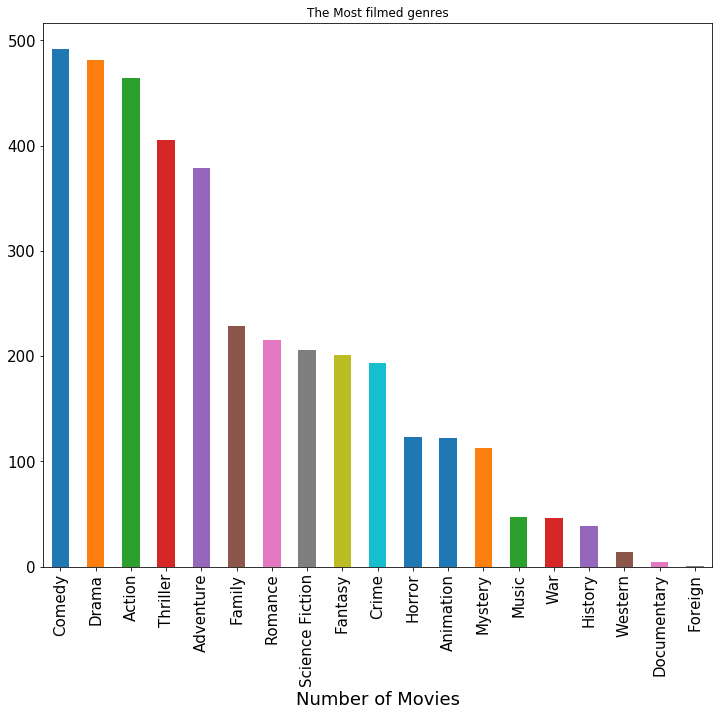

In [79]:
genre_data.sort_values(ascending=False, inplace=True)

plot_graph = genre_data.plot.bar(fontsize = 15)
plot_graph.set(title = 'The Most filmed genres')
plot_graph.set_xlabel('Number of Movies', fontsize = '18')
plot_graph.figure.set_size_inches(12, 10)
plt.show()

<a id='conclusions'></a>
## Conclusions

> The data analysis shows very interesting facts about the movies released in past years. Following are the interesting findings,

> 1. Comedy is the most preferred genre among all the movies.
> 2. Steven Spielberg was most successful directors among others in making more than 50M dollar.
> 3. Able to find most and least profits, budgets for the movies.

In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_TMDB_Dataset.ipynb'])

0